# Advisory Report, Company C
**Students: Andrei Dragomir 2669304, Ece Doganer 2552855, ..., ...**

In this notebook you will find:
1. Data exploration together with its visualization
2. Modelling a Neural Network with single hidden layer and no drop-out on the data


In [2]:


#TODO Bar charts/ pie charts for value distributions within our company - Mark
#     Correlation matrices - Ariana
#     Learning more about the M  1NN model - Ece
#     

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

### Part 1: Exploration

Visually explore the dataset, to get a feel for the information content and distributions of its features, and correlations between them. Visualise the data for your company, compared to overall population. What percentage of candidates is hired? How does this differ over gender, age, nationality, sports? 

TODO: write introduction, and signal what to expect


In [43]:
#Importing the dataset
recruitmentData = pd.read_csv (r'recruitmentdataset-2022-1.3.csv')
print (recruitmentData)

          Id  gender  age nationality     sport  ind-university_grade  \
0     x8011e  female   24      German  Swimming                    70   
1     x6077a    male   26      German      Golf                    67   
2     x6006e  female   23       Dutch   Running                    67   
3     x2173b    male   24       Dutch   Cricket                    70   
4     x6241a  female   26      German      Golf                    59   
...      ...     ...  ...         ...       ...                   ...   
3995  x7640e  female   28       Dutch   Running                    63   
3996  x3310f  female   27       Dutch    Tennis                    62   
3997  x1202g    male   24     Belgian     Rugby                    60   
3998  x1263d  female   22       Dutch    Tennis                    66   
3999  x2396a    male   28       Dutch  Football                    58   

      ind-debateclub  ind-programming_exp  ind-international_exp  \
0              False                False              

#### Demographic based analysis

In this section we take into consideration the distribution of candidates based on _gender_ and _nationality_ and the difference in approval rates based on these traits.

Observations:
1. We can observe that the majority of the candidates are of Dutch nationality;
2. We can observe that in all cases, the number of male candidates is higher than the female ones;
3. We can observe that the positive decision rate is highest for male candidates which does not show much in itself given that the number of male candidates is considerably higher but more        observations can be made in the following sections

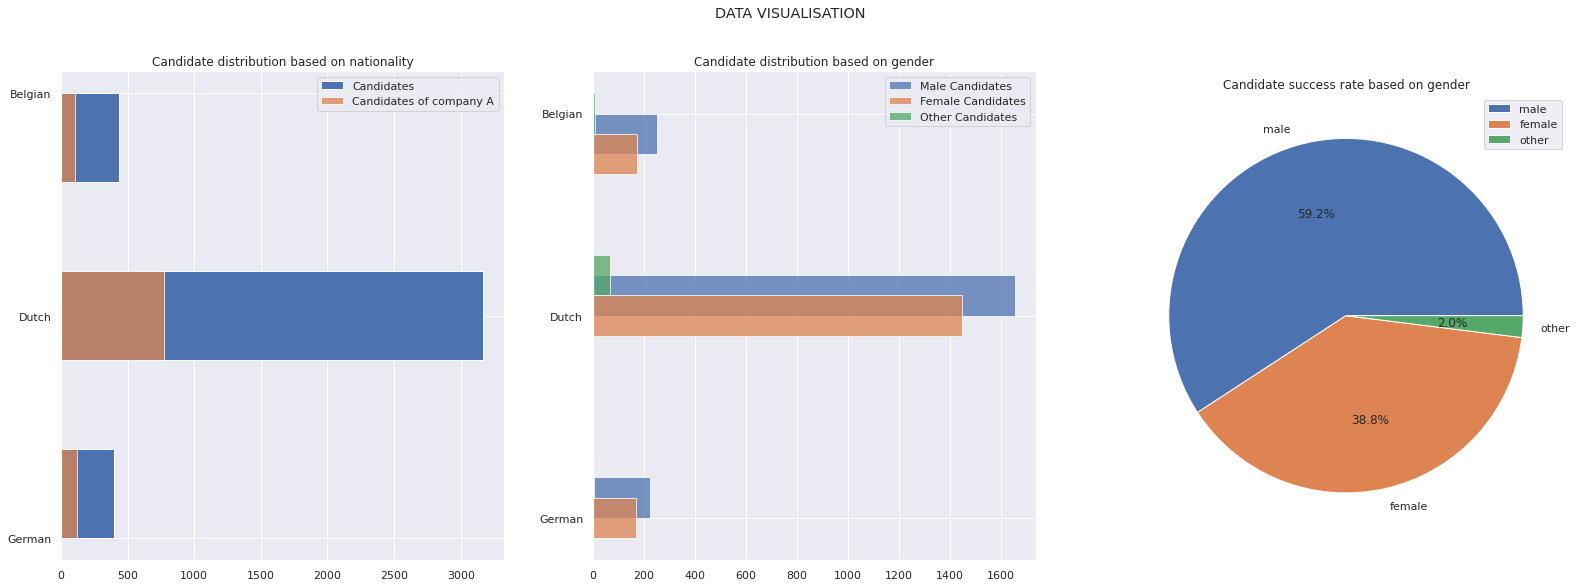

In [44]:
from turtle import title


recruitmentData.groupby('decision')['nationality'].describe()

demographicDataFrame = pd.DataFrame(recruitmentData, columns = ['nationality', 'gender', 'decision', 'company'])

#TODO Visualize differences between demographic distribution of hired candidates in our company as opposed to the general hired population;
#     Every candidate that applied to our company compared with the company's hired population. - Andrei
# It is shown how the hired population of your company differs from the hired population overall and the population that applied to your company


fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.suptitle('DATA VISUALISATION')
fig.set_figwidth(27)
fig.set_figheight(9)

#First plot
ax1.set_title("Candidate distribution based on nationality")
ax1.hist(demographicDataFrame['nationality'], label = 'Candidates', bins = 5, orientation='horizontal')
ax1.hist(demographicDataFrame.query("company == 'A'")['nationality'], bins = 5, label = 'Candidates of company A', orientation='horizontal', alpha = 0.75)
ax1.legend()

#Second plot
ax2.set_title("Candidate distribution based on gender")
ax2.hist(demographicDataFrame.query("gender == 'male'")['nationality'], label='Male Candidates', orientation='horizontal', align='mid', alpha= 0.75)
ax2.hist(demographicDataFrame.query("gender == 'female'")['nationality'], label='Female Candidates', orientation='horizontal', align='left', alpha= 0.75)
ax2.hist(demographicDataFrame.query("gender == 'other'")['nationality'], label='Other Candidates', orientation='horizontal', align='right', alpha= 0.75)
ax2.legend()

#Third plot
ax3.set_title("Candidate success rate based on gender")
ax3.pie(demographicDataFrame.query("decision == True")['gender'].value_counts(),labels=['male', 'female', 'other'], autopct='%1.1f%%')
ax3.legend()



Based on the following calculations, the success rate of male candidates is significantly higher than female success rate, thus, we can consider gender to be a feature of interest in our model traning.

In [47]:
maleDataFrame = demographicDataFrame[demographicDataFrame['gender'] == 'male']
maleSuccessRate = (maleDataFrame[maleDataFrame['decision']].value_counts()/ maleDataFrame['decision'].count()) * 100

print(maleSuccessRate)

femaleDataFrame = demographicDataFrame[demographicDataFrame['gender'] == 'female']
femaleSuccessRate = (femaleDataFrame[femaleDataFrame['decision']].value_counts()/ femaleDataFrame['decision'].count()) * 100

print(femaleSuccessRate)

print("Male cummulative success rate: " + str(maleSuccessRate.sum()))
print("Female cummulative success rate: " + str(femaleSuccessRate.sum()))

nationality  gender  decision  age  company
Dutch        male    True      25   B          1.410437
                               28   A          1.410437
                               26   B          1.363423
                               24   B          1.269394
                               26   A          1.222379
                                                 ...   
Belgian      male    True      30   C          0.047015
                               31   A          0.047015
German       male    True      23   B          0.047015
                               22   A          0.047015
Belgian      male    True      21   B          0.047015
Length: 111, dtype: float64
nationality  gender  decision  age  company
Dutch        female  True      28   D          1.284916
                               26   A          1.117318
                               27   A          1.061453
                               28   C          0.893855
                               27   D       

The following section will focus on the analysis of professional and academic levels of the candidates and how that affects their success rate

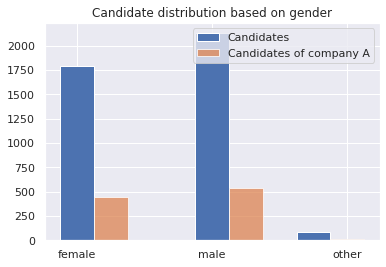

In [48]:


plt.title("Candidate distribution based on gender")
plt.hist(demographicDataFrame['gender'], label = 'Candidates', bins = 8, align= 'left')
plt.hist(demographicDataFrame.query("company == 'A'")['gender'], bins = 8, label = 'Candidates of company A', alpha = 0.75, align='right')
plt.legend()

TypeError: scatter() missing 1 required positional argument: 'y'

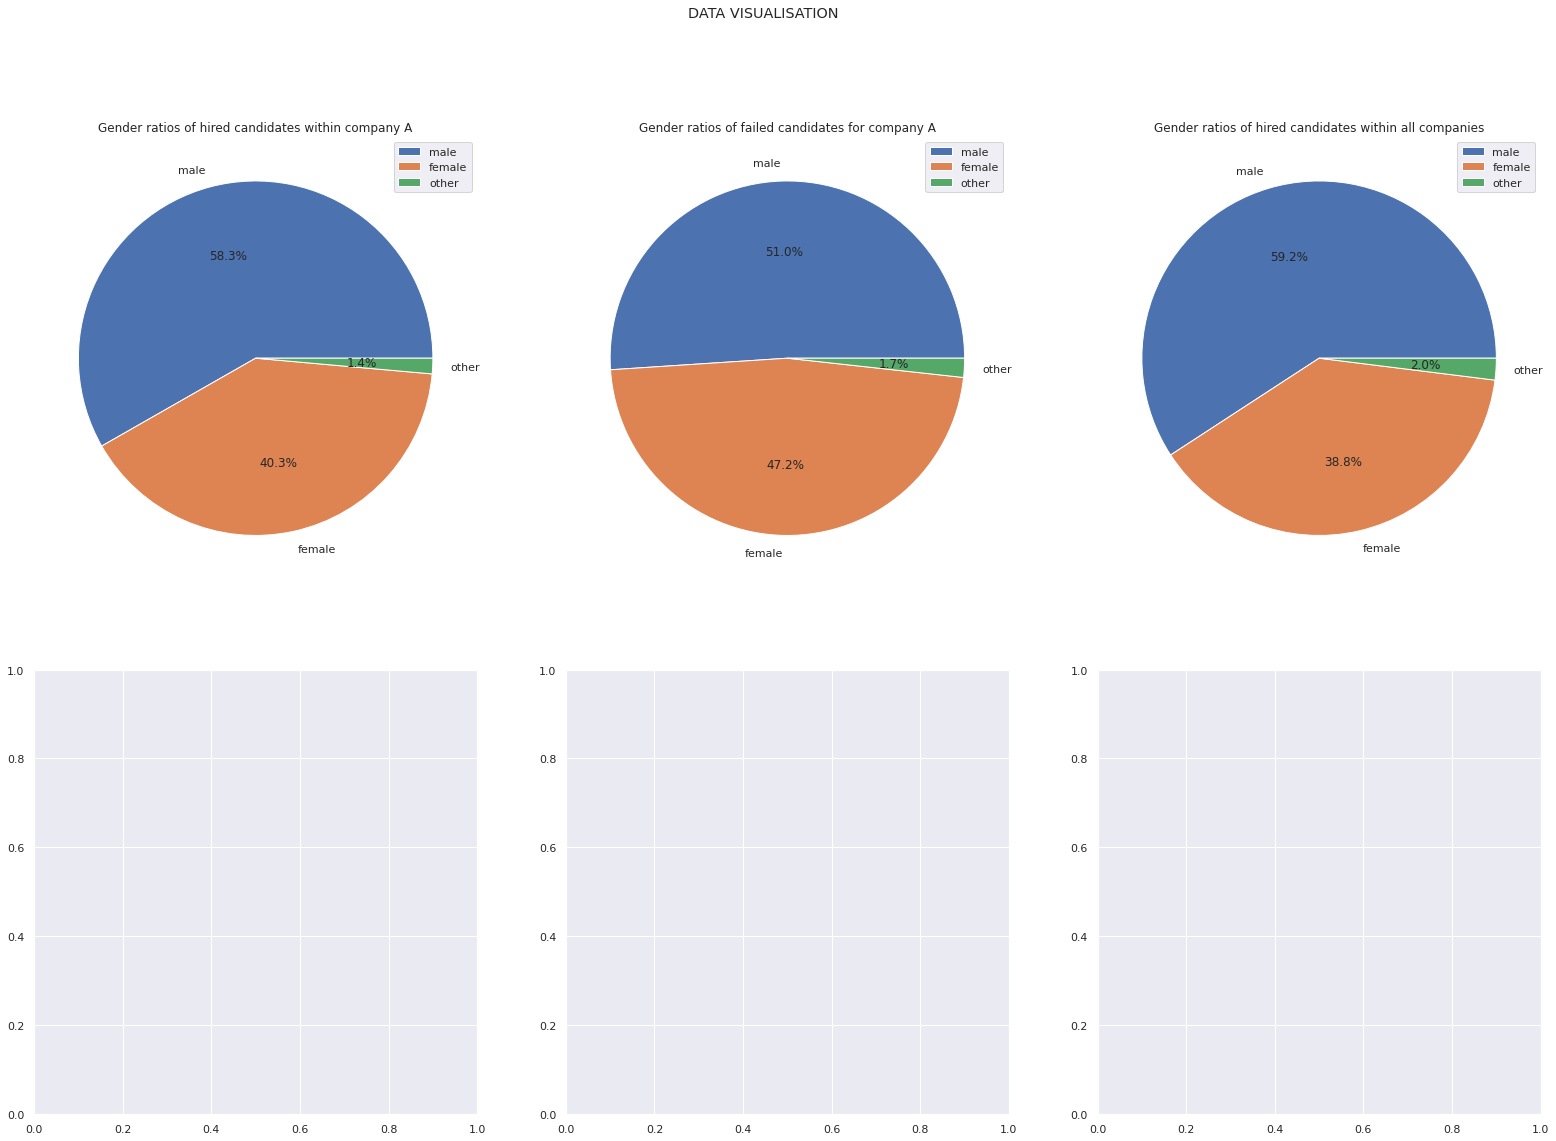

In [58]:
recruitmentData.groupby('decision')['nationality'].describe()

demographicDataFrame = pd.DataFrame(recruitmentData, columns = ['nationality', 'gender', 'decision', 'age', 'company'])

#TODO Visualize differences between demographic distribution of hired candidates in our company as opposed to the general hired population;
#     Every candidate that applied to our company compared with the company's hired population. - Andrei
# It is shown how the hired population of your company differs from the hired population overall and the population that applied to your company


fig1, axs = plt.subplots(2,3)
fig1.suptitle('DATA VISUALISATION')
fig1.set_figwidth(27)
fig1.set_figheight(18)

#First plot
axs[0,0].pie(demographicDataFrame.query("company == 'A' and decision == True")['gender'].value_counts(),labels=['male', 'female', 'other'], autopct='%1.1f%%')
axs[0,0].set_title("Gender ratios of hired candidates within company A")
axs[0,0].legend()

#Second plot
axs[0,1].pie(demographicDataFrame.query("company == 'A' and decision != True")['gender'].value_counts(),labels=['male', 'female', 'other'], autopct='%1.1f%%')
axs[0,1].set_title("Gender ratios of failed candidates for company A")
axs[0,1].legend()

#Third plot
axs[0,2].pie(demographicDataFrame.query("decision == True")['gender'].value_counts(),labels=['male', 'female', 'other'], autopct='%1.1f%%')
axs[0,2].set_title("Gender ratios of hired candidates within all companies")
axs[0,2].legend()

#Fourth plot
axs[1,2].scatter(demographicDataFrame.query("decision == True")['age'].value_counts(), autopct='%1.1f%%')
axs[1,2].set_title("Gender ratios of hired candidates within all companies")
axs[1,2].legend()


### M1: Neural Network with a single hidden layer and with drop-out

(apparently we are competing with other groups in terms of accuracy/.../...)

TODO: intro txt here, signalling what to expect

#### Splitting the data
TODO: explain how we decided to split the data (generalisation and regularisation),

#### Best 4 indicators 
TODO: explain best choice for indicators (test other sets of indicators)

#### 3 vs 4 vs 5 indicators
TODO: explain choice for 4 indicators opposed to 3 and 5 (testing again sets of indicators) (make sure to note explainability of 4 indicators)

#### Tuning hyperparameters

TODO: explain how the vars determining learning rate and number of hidden units 